In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
inputs  = df[['Pclass','Sex','Age','Fare']]
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [4]:
inputs  = df[['Pclass','Sex','Age','Fare']]
inputs

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [5]:
inputs.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [6]:
median = inputs.Age.median()
median

28.0

In [7]:
inputs['Age'] = inputs.Age.fillna(median)
inputs

C:\Users\hp\AppData\Local\Temp\ipykernel_18908\2396544493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['Age'] = inputs.Age.fillna(median)


,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,28.0,23.4500
889,1,male,26.0,30.0000


In [8]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [9]:
from sklearn.preprocessing import LabelEncoder
le_Sex = LabelEncoder()

In [10]:
inputs['Sex_n'] = le_Sex.fit_transform(inputs['Sex'])

C:\Users\hp\AppData\Local\Temp\ipykernel_18908\2880279789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs['Sex_n'] = le_Sex.fit_transform(inputs['Sex'])


In [11]:
inputs.head()

,Pclass,Sex,Age,Fare,Sex_n
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [12]:
inputs.drop(['Sex'],axis='columns',inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_18908\3451523063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs.drop(['Sex'],axis='columns',inplace=True)


In [13]:
from sklearn.model_selection import train_test_split


In [15]:
target = df['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
X_train , X_test , Y_train , Y_test = train_test_split(inputs,target,test_size=0.2)

In [17]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [20]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [21]:
model.score(X_test,Y_test)

0.7486033519553073

In [24]:
inputs.head()

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [29]:
print("Enter the following details to predict survival on the Titanic:")
pclass = int(input("Passenger Class (1, 2, or 3): "))
age = float(input("Age: "))
fare = float(input("Fare: "))
sex = input("0 for male 1 for female")
user_input = [[pclass, age, fare, sex]]

    # Predicting the survival
predict = model.predict(user_input)
    
if predict == 0:
        print("Not Survived")
else:
        print("Survived")

Enter the following details to predict survival on the Titanic:
Not Survived


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


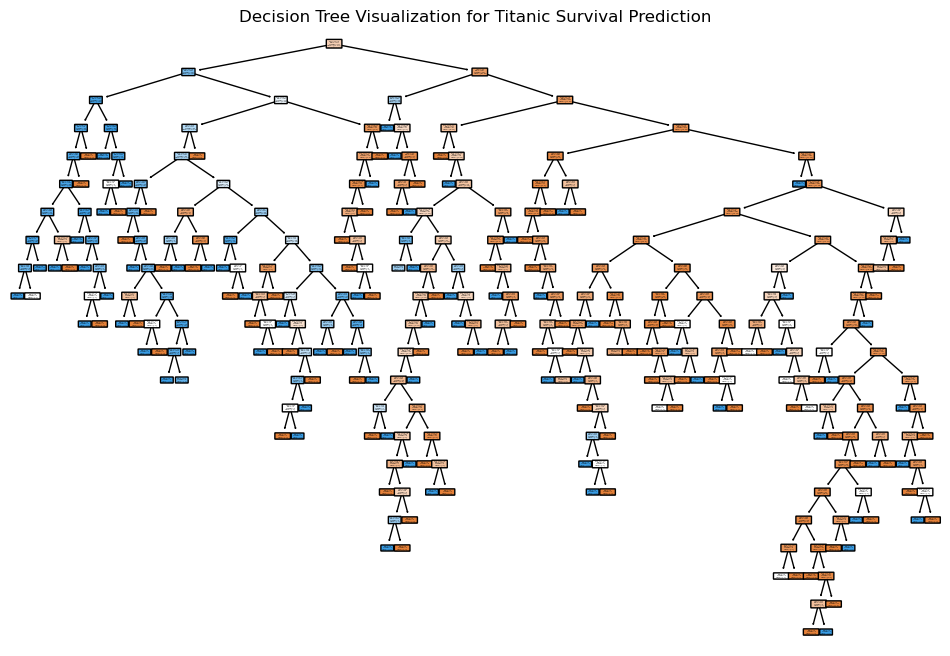

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))  # Set the figure size
tree.plot_tree(model, 
               feature_names=['Pclass', 'Age', 'Fare', 'Sex_n'], 
               class_names=['Not Survived', 'Survived'], 
               filled=True, 
               rounded=True)
plt.title("Decision Tree Visualization for Titanic Survival Prediction")
plt.show()